## Customer Chrun Prediction Project
- Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

- The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.



In [295]:
##########################################################################

### Details of the Columns in the Dataset:
- customerID:
    - The ID of the Customer
    
- gender:
    - The gender of the customer (Categorical: 'Male', 'Female').

- SeniorCitizen:
    - Whether the customer is a senior citizen (Binary: 0 or 1).
    - 0: Not a senior citizen, 1: Senior citizen.
- Partner:
    - Whether the customer has a partner (Categorical: 'Yes', 'No').

- Dependents:
    - Whether the customer has dependents (Categorical: 'Yes', 'No').

- tenure:
    - The number of months the customer has been with the company (Numerical: integer values).
    - A customer who has been with the company for a longer period is less likely to churn.

- PhoneService:
    - Whether the customer has phone service (Categorical: 'Yes', 'No', 'No phone service').
    - 'No phone service' indicates that the customer does not have phone service, which is a bit different from the regular 'Yes'/'No' responses.

- MultipleLines:
    -   Whether the customer has multiple phone lines (Categorical: 'Yes', 'No', 'No phone service').

- InternetService:
    - Type of internet service the customer has (Categorical: 'DSL', 'Fiber optic', 'No').
    - Indicates whether the customer uses DSL, fiber optic, or has no internet service.

- OnlineSecurity:
    - Whether the customer has online security (Categorical: 'Yes', 'No').

- OnlineBackup:
    - Whether the customer has online backup (Categorical: 'Yes', 'No').


- DeviceProtection:
    -   Whether the customer has device protection (Categorical: 'Yes', 'No').


- TechSupport:
    -   Whether the customer has tech support (Categorical: 'Yes', 'No').


- StreamingTV:
    - Whether the customer has streaming TV (Categorical: 'Yes', 'No').

- StreamingMovies:
    - Whether the customer has streaming movies (Categorical: 'Yes', 'No').
- Contract:
    - The type of contract the customer has (Categorical: 'Month-to-month', 'One year', 'Two year').
    - A 'Month-to-month' contract typically indicates that the customer is more likely to churn compared to longer-term contracts.
- PaperlessBilling:
    - Whether the customer uses paperless billing (Categorical: 'Yes', 'No').

- PaymentMethod:
    - The payment method used by the customer (Categorical: 'Electronic check', 'Mailed check', 'Bank transfer', 'Credit card').


- MonthlyCharges:
    - The monthly charges of the customer (Numerical: float values).
    - Customers with higher monthly charges may be more likely to churn.

- TotalCharges:
    - The total charges for the customer (Numerical: float values).
    - Total charges reflect the accumulated charges over the customer's tenure with the company.

- Churn:
    - Target variable (Categorical: 0 or 1).
    - 1: The customer has churned (left the company).
    - 0: The customer has not churned.

In [296]:
# import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [297]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## Data Loading and Datanderstanding

In [298]:
## Load the Dataset 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [299]:
#Display the First  Rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [300]:
##shape 
df.shape

(7043, 21)

In [301]:
## By default, if a DataFrame has many columns, Pandas will truncate the output and show only a limited number of columns to keep the display manageable.
## we are telling Pandas to display all the columns, even if there are many.
pd.set_option("display.max_columns", None)

In [302]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### **Exploratory DataAnlaysis**

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [304]:
## Drop the Customer ID Column as this is not Requried For Modeling
df = df.drop(columns = ["customerID"])

In [305]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [306]:
## All the Cloumns from the Dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [307]:
## We will print all the unique values 
df['Churn'].nunique()

2

In [308]:
# Print the column name and its number of unique values
numeric_features_list = ["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
    if col not in numeric_features_list:
        print(col,":-", df[col].unique())  
        print('--'*50)


gender :- ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen :- [0 1]
----------------------------------------------------------------------------------------------------
Partner :- ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents :- ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService :- ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines :- ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService :- ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity :- ['No' 'Yes' 'No internet service']
--------------

In [309]:
#Check for the Missing Values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [310]:
##Convert the TotalCharges  to object to the Float
#df["TotalCharges "] = df["TotalCharges"].astype(float)

In [311]:
#Find the Empty Rows in the TotalCharges  Column
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [312]:
len(df[df["TotalCharges"]==" "]) #we have 11 columns of Empty values

11

In [313]:
#Here we will replace the Empty Values with Zero
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"}) 

In [314]:
##Convert the TotalCharges  to object to the Float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [315]:
##Check the Columns Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Checking the Distribution ofthe Trget Column


<Axes: xlabel='Churn'>

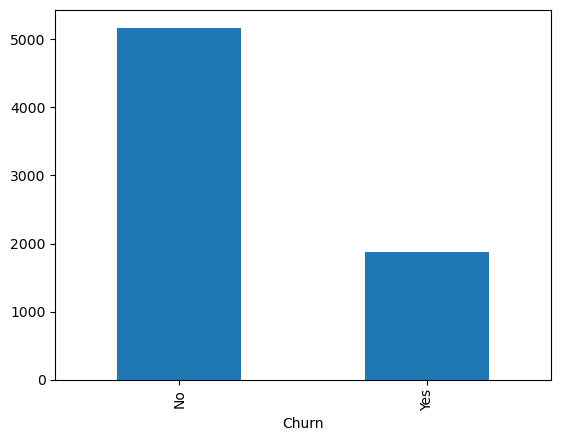

In [316]:
#Taget Columns is Churn 
df["Churn"].value_counts().plot(kind = 'bar')

### **Insights**

1.CustomerID Removed as it was not Requried for Modelling

2.No Missing Values in the Dataset

3.Missing Values in the TotalCharges Column were replaced with 0

4.Class imbalace identified in the target Column



In [317]:
## Find the Shape
df.shape

(7043, 20)

In [318]:
## Find the all columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [319]:
##Describe the Dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- **Numerical Features - Analysis** 
- Understand the Distribution of the Numerical Features

In [320]:
# Select numerical columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Display the numerical columns
numeric_columns.drop(columns = "SeniorCitizen",inplace = True)


In [321]:
numeric_columns

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [322]:
## Histogram for the Numerical Features

#function for the numeric columns
def plot_histogram(df,column_name):
    plt.figure(figsize = (5,3))
    sns.histplot(df[column_name],kde = True)
    plt.show()
    

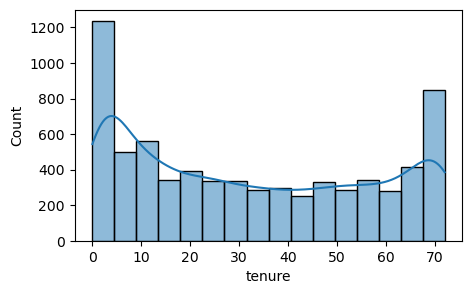

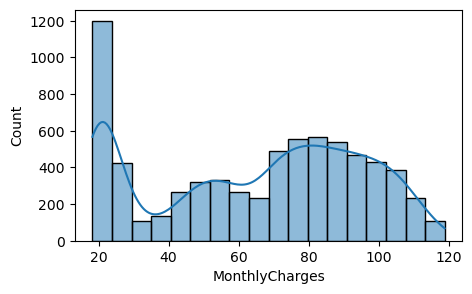

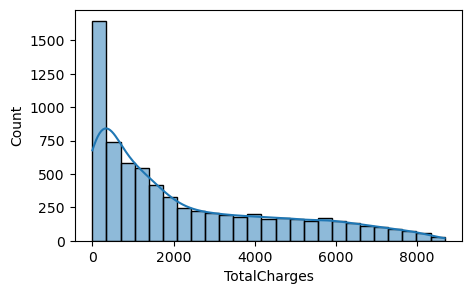

In [323]:
for cols in numeric_columns:
    plot_histogram(df,cols)

#### **BoxPlot for Numeric Features**

In [324]:
##Function for the BoxPlot
def plot_boxplot(df,col_name):
    plt.figure(figsize = (5,3))
    sns.boxplot(y = df[col_name])
    plt.title(f"Box Plot of{col_name}")
    plt.ylabel(col_name)
    plt.show()

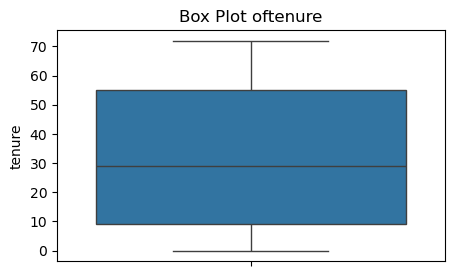

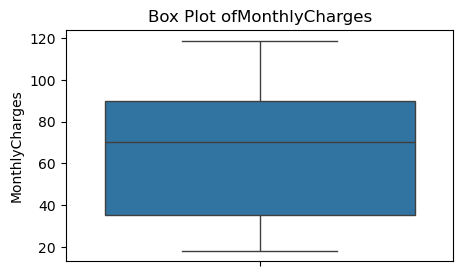

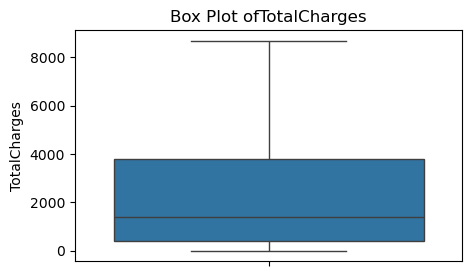

In [325]:
### Call the Boxplot Function for Every Numeric Columns 
for cols in numeric_columns:
    plot_boxplot(df,cols)

#### **Correlation HeatMap For Numerical Colums**

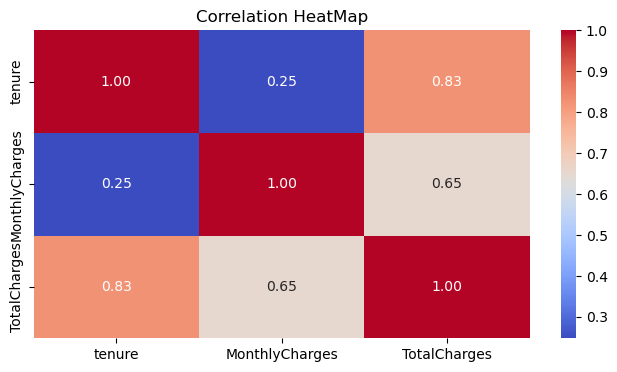

In [326]:
### Correlation Matrix - HeatMAp 
plt.figure(figsize = (8,4))
sns.heatmap(numeric_columns.corr(),annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Correlation HeatMap")
plt.show()

#### **Categorical Features - Analysis**

In [327]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [328]:
categorical_cols = df.select_dtypes(include = "object")
categorical_cols = categorical_cols.columns.to_list()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

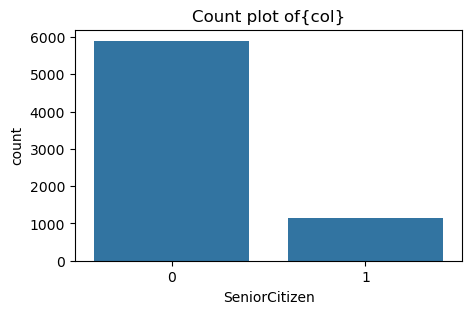

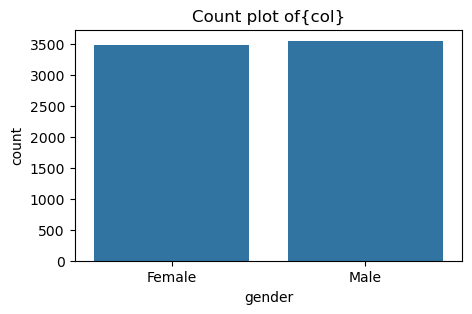

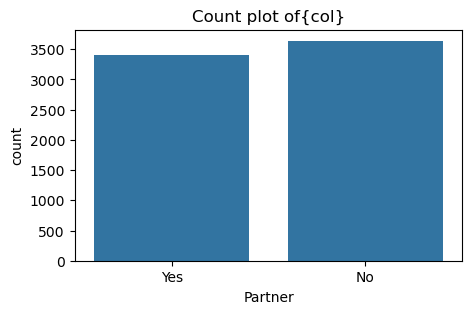

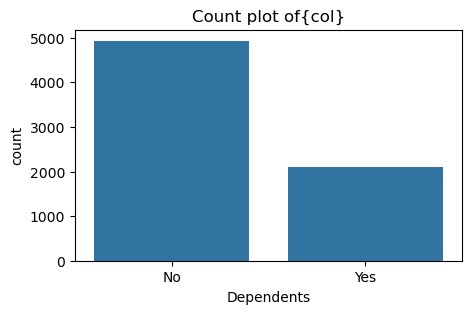

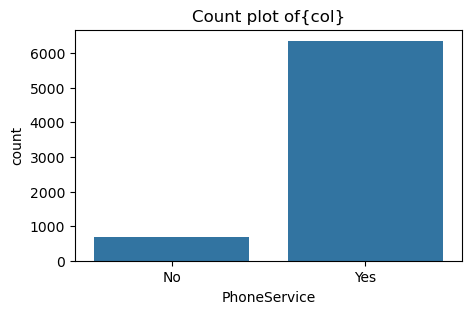

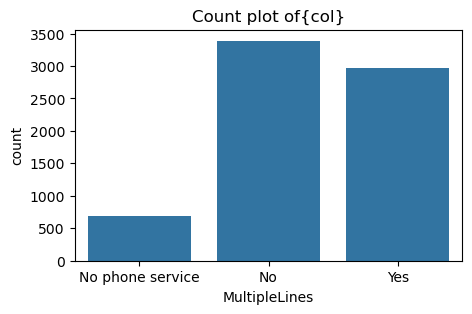

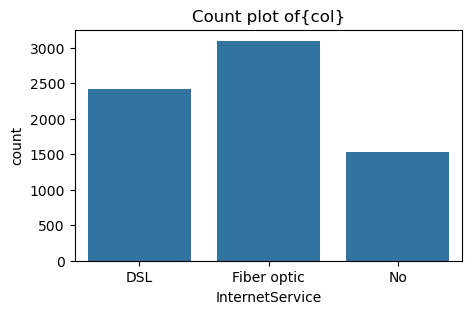

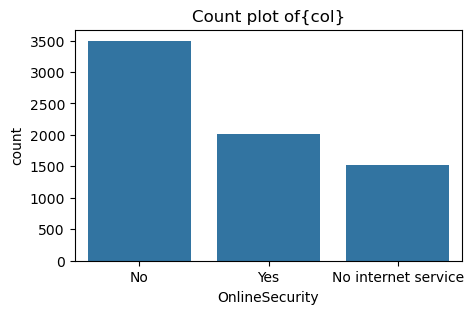

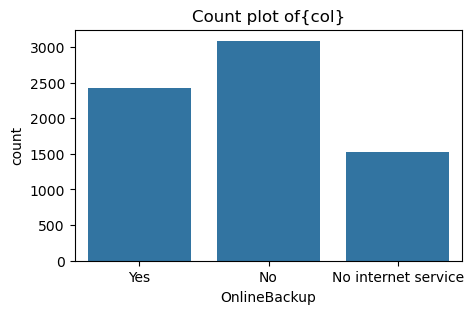

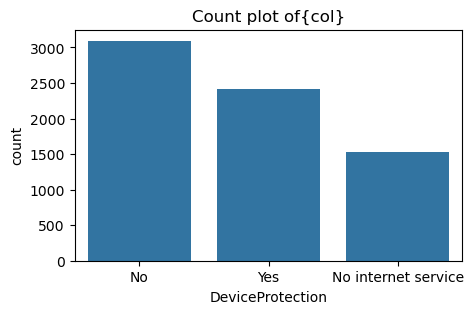

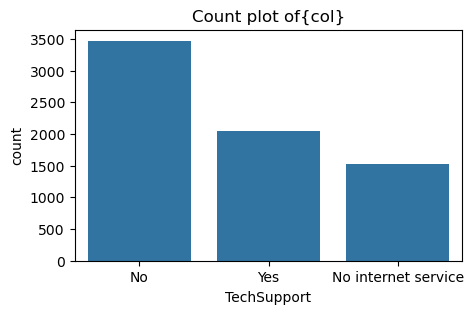

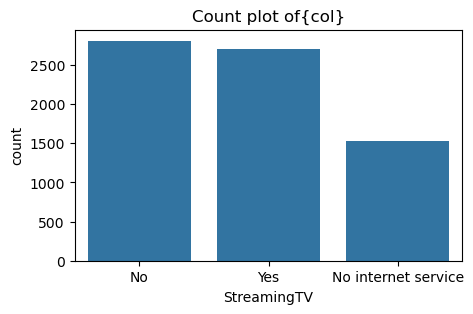

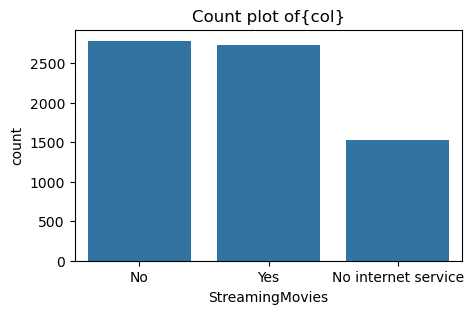

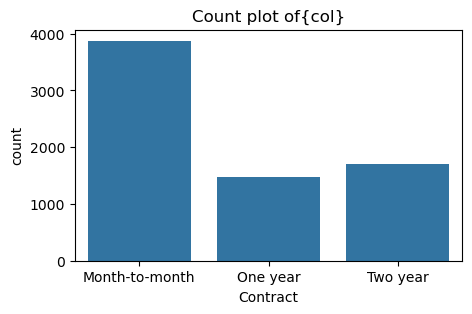

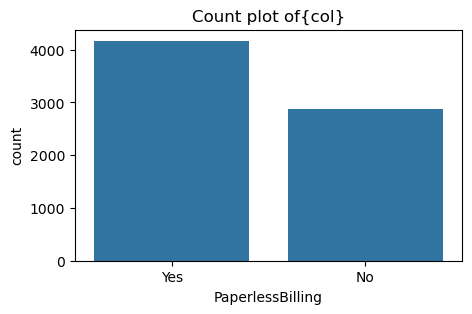

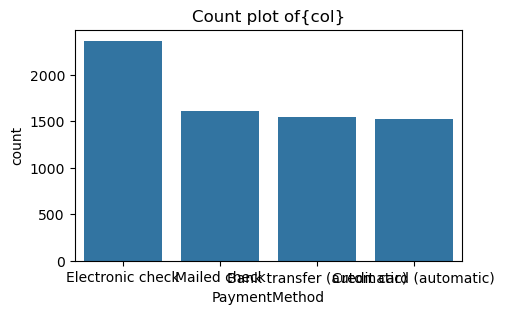

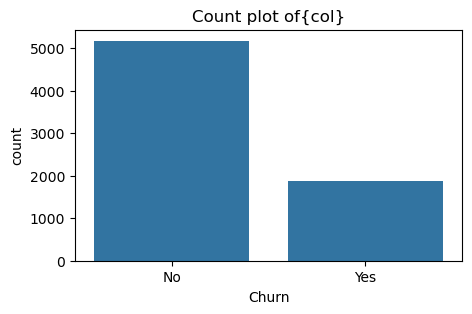

In [329]:
##Add the SeniorCitizen Column to the Object_cols
categorical_cols = ["SeniorCitizen"] + categorical_cols 
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x = df[col])
    plt.title("Count plot of{col}")
    plt.show()

#### **DataPreprocessing**


In [330]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


- Label Encoding of Target Column

In [331]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


C:\Users\sm689\AppData\Local\Temp\ipykernel_4680\3214887850.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [332]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [333]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

#### **Label Encoding of Categorical Features**

In [334]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [335]:
## Intialize the Dictionary to Save the Encoder 
encoders = {}

#Apply the Label Encoding and Store the Encoders 
for column in object_columns:
    label_encoder = LabelEncoder() ##Call the Label Encoder
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder 




In [336]:
#Save the Encoders to a Pickle File 
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f) 

In [337]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [338]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### **Train-Test-Split**


In [339]:
#Splitting the Features and Target
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [340]:
# Split the Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [341]:
#Split the Training and Test Data 
print("X_train Shape:-",X_train.shape)
print("X_test Shape:-",X_test.shape)
print("y_train Shape:-",y_train.shape)
print("y_test Shape:-",y_test.shape) 

X_train Shape:- (5634, 19)
X_test Shape:- (1409, 19)
y_train Shape:- (5634,)
y_test Shape:- (1409,)


In [342]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


#### **Synthetic Minority OverSampling Technique(SMOTE)**

In [343]:
smote = SMOTE(random_state = 42)

In [344]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [345]:
print(y_train_smote.shape)

(8276,)


In [346]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


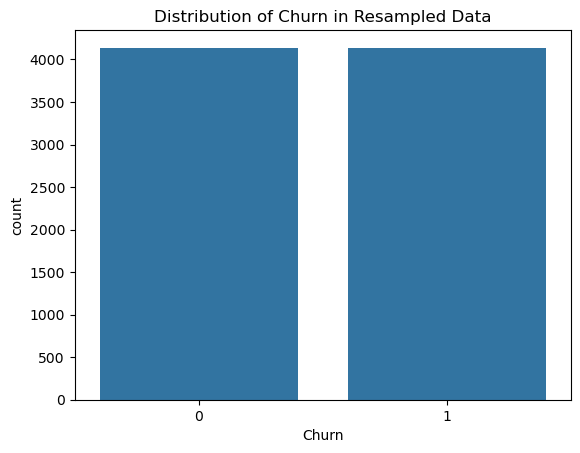

In [347]:
# Countplot for the resampled target variable
sns.countplot(x = y_train_smote) 
plt.title("Distribution of Churn in Resampled Data")  
plt.show() 

#### **Model Bulding**

In [348]:
# dictionary of models
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


# Hyperparameter tuning for XGBoost using GridSearchCV
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1]
}



In [349]:
# Iterate over each model in the models dictionary and fit the model
# Training and evaluating models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("--" * 50)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.7630
Logistic Regression - Confusion Matrix:
[[785 251]
 [ 83 290]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1036
           1       0.54      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

----------------------------------------------------------------------------------------------------
Training Decision Tree...
Decision Tree - Accuracy: 0.7282
Decision Tree - Confusion Matrix:
[[823 213]
 [170 203]]
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1036
           1       0.49      0.54      0.51       373

    accuracy                           0.73      1409
   macro avg       0

c:\Users\sm689\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.7786
Random Forest - Confusion Matrix:
[[878 158]
 [154 219]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

----------------------------------------------------------------------------------------------------
Training AdaBoost...


c:\Users\sm689\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.7651
AdaBoost - Confusion Matrix:
[[796 240]
 [ 91 282]]
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.76      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

----------------------------------------------------------------------------------------------------
Training GradientBoost...
GradientBoost - Accuracy: 0.7750
GradientBoost - Confusion Matrix:
[[824 212]
 [105 268]]
GradientBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.56      0.72      0.63       373

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.

In [294]:
### Try the XGB Boost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Classification Report:")
print(classification_report(y_test, y_pred))
print("--" * 50)



XGBoost Accuracy: 0.7856635911994322
Confusion Matrix:
[[883 153]
 [149 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

----------------------------------------------------------------------------------------------------


### **HyperParameter Tuning**

In [350]:
from sklearn.model_selection import GridSearchCV


In [351]:
# XGBoost model
xgb_model  = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    #'gamma': [0.25],
    'subsample': [0.8, 1]
    
}





In [352]:

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [353]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8378589255221331


Best Score: 0.8378589255221331


#### **Save the Model**

In [363]:
# Save the best model from GridSearchCV
# Save the best XGBoost model after GridSearchCV
import joblib
best_xgb_model = grid_search.best_estimator_



In [365]:
# Save the best model using joblib
joblib.dump(best_xgb_model, "xgb_model.joblib")
print("Model saved as xgb_model.joblib")


Model saved as xgb_model.joblib


In [366]:
import os
print(os.getcwd())


c:\Users\sm689\Desktop\Git_Demo_2\Customer Churn Prediction Using Machine Learning


In [367]:

# Load the XGBoost model using joblib
loaded_model = joblib.load("xgb_model.joblib")


In [368]:
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [369]:
# Load the XGBoost model
loaded_model = joblib.load("xgb_model.joblib")

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)

In [370]:
predictions

array([1, 0, 0, ..., 0, 0, 1])

In [371]:


# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.7750177430801988
Confusion Matrix:
[[878 158]
 [159 214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409

